In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Put this data into a variable

In [2]:
wrangled_WHO_data = pd.read_csv(r'C:\Users\moder\Documents\Springboard\PROJECTS ASSIGNMENTS files and instructions\Capstones\Capstone 2\wrangled_WHO_data.csv')

wrangled_WHO_data.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life_Expectancy,65.0,59.9,59.9,59.5,59.2
Adult Mortality,263.0,271.0,268.0,272.0,275.0
infant deaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
Percentage_Expenditure,71.279624,73.523582,73.219243,78.184215,7.097109
Hepatitis B,65.0,62.0,64.0,67.0,68.0
Measles,1154,492,430,2787,3013


In [3]:
#reminder - data types
wrangled_WHO_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Life_Expectancy               2938 non-null   float64
 4   Adult Mortality               2938 non-null   float64
 5   infant deaths                 2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   Percentage_Expenditure        2938 non-null   float64
 8   Hepatitis B                   2938 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  under-five deaths             2938 non-null   int64  
 12  Polio                         2938 non-null   float64
 13  Tot

In [4]:
wrangled_WHO_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Life_Expectancy               2938 non-null   float64
 4   Adult Mortality               2938 non-null   float64
 5   infant deaths                 2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   Percentage_Expenditure        2938 non-null   float64
 8   Hepatitis B                   2938 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  under-five deaths             2938 non-null   int64  
 12  Polio                         2938 non-null   float64
 13  Tot

# Feature Selection

In [5]:
#I'm not going to use STATUS bc it's informed by all the other features, 
#plus I've noticed there is some issue with some countries not being designated correctly.

X = wrangled_WHO_data[['Schooling','Income_Composition_Resources','Percentage_Expenditure']]
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (2938, 3)


In [6]:
X

,Schooling,Income_Composition_Resources,Percentage_Expenditure
0,10.1,0.479,71.279624
1,10.0,0.476,73.523582
2,9.9,0.470,73.219243
3,9.8,0.463,78.184215
4,9.5,0.454,7.097109
...,...,...,...
2933,9.2,0.407,8.717409
2934,9.5,0.418,8.717409
2935,10.0,0.427,8.717409
2936,9.8,0.427,8.717409


In [7]:
y = wrangled_WHO_data['Life_Expectancy']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (2938,)


In [8]:
list(X.columns)

['Schooling', 'Income_Composition_Resources', 'Percentage_Expenditure']

In [9]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_Expectancy, Length: 2938, dtype: float64

# Split into Train and Test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)
print('Training split has ', X_train.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_train))+ ')')
print('Test split has ', X_test.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_test)) + ')')

Training split has  2203  rows
 and the corresponding labels have an equal number of values. (2203)
Test split has  735  rows
 and the corresponding labels have an equal number of values. (735)


# Recalling the guided capstone, it had us consider the MEAN - how good the mean is as a predictor?

In [11]:
#Fit the dummy regressor on the training data
from sklearn.dummy import DummyRegressor

dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[69.16806627]])

In [12]:
#check out some metrics - again referring back to guided capstone

#r^2
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([69.16806627, 69.16806627, 69.16806627, 69.16806627, 69.16806627])

In [13]:
#Calculate the R^2 - amount of variance
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
      
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

r_squared(y_train, y_tr_pred)

0.0

If you use the average value as your prediction, you get an R^2 of zero on the training set. What if you use this "model" to predict unseen values from the test set? Remember, of course, that your "model" is trained on the training set; you still use the training set mean as your prediction.

Make your predictions by creating an array of length the size of the test set with the single value of the (training) mean.

In [14]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

69.1680662732637

In [15]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.00038692692903219417

In [16]:
#use sklearn to compare
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.00038692692903219417)

OK this fits the data really poorly!

In [17]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(7.789523406059784, 7.775434364394878)

SO this is saying that this essentially says, on average, we'd be off by around 8 (eight) years (of life expectancy) if we guessed based on an average of known values.

In [18]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(90.39889058662011, 90.51160014803055)

In [19]:
print('Train MSE: ',np.sqrt(mean_squared_error(y_train, y_tr_pred)))
print('Test MSE: ',np.sqrt(mean_squared_error(y_test, y_te_pred)))

Train MSE:  9.507833117310174
Test MSE:  9.513758465928728


Error on both train and test about 9.5 (life expectancy years).

# Standardize the magnitude of numeric features using a scaler

In [20]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

# Model 1: Linear Regression

Train the model on the train split

In [21]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

Make predictions using the model on both train and test splits

In [22]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

Assess model performance

In [23]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.5385353447609016, 0.5473150595929861)

A simple linear regression model explains only about 50% of the variance on the train set and basically the same on the test set.

Calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function

In [24]:
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(4.537319239862061, 4.500303323962902)

Using this model, then, on average you'd expect to estimate life expectancy within 4 or so years of the actual number.

In [25]:
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(41.71589287855163, 40.9573908017106)

In [26]:
print('Train MSE: ',np.sqrt(mean_squared_error(y_train, y_tr_pred)))
print('Test MSE: ',np.sqrt(mean_squared_error(y_test, y_te_pred)))

Train MSE:  6.458784164109498
Test MSE:  6.39979615313727


# Linear Regression: Summary

In [27]:
# score the model on the train set
print('Train score: {}\n'.format(lm.score(X_tr_scaled,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(lm.score(X_te_scaled,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,y_te_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test,y_te_pred))))

Train score: 0.5385353447609016

Test score: 0.5473150595929861

Overall model accuracy: 0.5473150595929861

Mean Squared Error: 6.39979615313727


No overfitting here. But the MSE is high, the accuracy could be higher.

In [28]:
#save model accuracy for comparison 
lraccuracy = r2_score(y_test,y_te_pred)

# Model 2: KNN

In [29]:
from math import sqrt
%matplotlib inline

Store rmse values for different k. RMSE measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy). A value of 0 would indicate a perfect fit to the data.

In [30]:
rmse_val = [] 

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_tr_scaled, y_train) #fit model
    pred = model.predict(X_te_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print("RMSE value for k=", K, "is:", error)

RMSE value for k= 1 is: 5.2013479414631805
RMSE value for k= 2 is: 4.711426441710223
RMSE value for k= 3 is: 4.6510138769030105
RMSE value for k= 4 is: 4.681886525437672
RMSE value for k= 5 is: 4.746261486184479
RMSE value for k= 6 is: 4.769714310435647
RMSE value for k= 7 is: 4.737246511636152
RMSE value for k= 8 is: 4.782153164886291
RMSE value for k= 9 is: 4.844528866621745
RMSE value for k= 10 is: 4.844772408883368
RMSE value for k= 11 is: 4.862030196762176
RMSE value for k= 12 is: 4.862295753773678
RMSE value for k= 13 is: 4.876721198983847
RMSE value for k= 14 is: 4.881928251066693
RMSE value for k= 15 is: 4.8872288039039296
RMSE value for k= 16 is: 4.873857269205879
RMSE value for k= 17 is: 4.885973395734088
RMSE value for k= 18 is: 4.87057094017516
RMSE value for k= 19 is: 4.8496291358214
RMSE value for k= 20 is: 4.848108331737082


<AxesSubplot:>

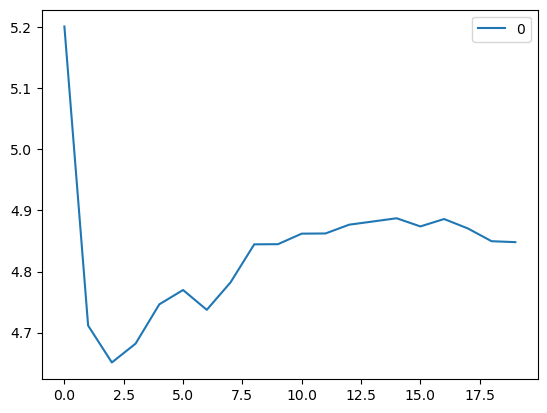

In [31]:
curve = pd.DataFrame(rmse_val)
curve.plot()

I'm going to go with a K of 3

Instantiate and fit the model using the training data and training targets

In [32]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 3
model2 = neighbors.KNeighborsRegressor(n_neighbors = 3)

model2.fit(X_tr_scaled, y_train)

print(model2)

KNeighborsRegressor(n_neighbors=3)


In [33]:
model2.predict(X_te_scaled)

array([78.        , 81.4       , 67.36666667, 52.7       , 63.2       ,
       48.96666667, 78.23333333, 63.26666667, 78.06666667, 74.66666667,
       79.8       , 61.53333333, 72.36666667, 67.13333333, 67.46666667,
       79.43333333, 74.36666667, 81.4       , 63.4       , 75.03333333,
       48.8       , 53.26666667, 59.1       , 72.33333333, 68.2       ,
       74.23333333, 74.4       , 81.6       , 48.03333333, 65.16666667,
       54.13333333, 74.03333333, 81.8       , 54.86666667, 62.16666667,
       73.86666667, 75.46666667, 75.5       , 73.26666667, 73.26666667,
       60.9       , 75.93333333, 68.5       , 49.23333333, 55.73333333,
       55.63333333, 73.7       , 72.63333333, 72.86666667, 62.9       ,
       75.66666667, 65.16666667, 76.86666667, 75.4       , 71.53333333,
       77.4       , 62.33333333, 79.1       , 59.03333333, 72.6       ,
       76.63333333, 66.5       , 75.73333333, 51.2       , 73.63333333,
       73.86666667, 68.4       , 72.        , 76.4       , 65.66

# KNN Summary

In [34]:
# score the model on the train set
print('Train score: {}\n'.format(model2.score(X_tr_scaled,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model2.score(X_te_scaled,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,pred)))

Train score: 0.8923908807832247

Test score: 0.7609113083402785

Overall model accuracy: 0.7402183946799865



OK so this is a bit overfitted. But accuracy/precision is at 74%! Let's try Decision Tree!

<One note: the more independent variables I feed into the model, it appears, the better scores/performance. With only 3 the performance here is slightly worse.>

In [35]:
#save model accuracy for comparison
knnaccuracy = r2_score(y_test,pred)

# Model 3: Decision Tree

In [36]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model

Fit regression model, predict

In [37]:
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)
print("Score: ",r2_score(y_test, yhat))
print("MAE: ",mean_absolute_error(y_test, yhat))
print("MSE: ",np.sqrt(mean_squared_error(y_test, yhat)))

Score:  0.6229755467004949
MAE:  3.7697278911564625
MSE:  5.840538310387326


The score is only about 61% (precision/accuracy). That could be higher. The MAE and MSE aren't so bad!

Comparing the Real Values with Predicted Values

In [38]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':yhat})
df

,Real Values,Predicted Values
1929,76.0,73.4
2347,85.0,77.3
1876,73.0,71.3
2257,62.1,51.4
846,53.8,53.2
...,...,...
2750,76.3,76.0
2515,85.0,88.0
708,69.8,79.3
655,74.9,72.0


Try to improve accuracy!

# Tuning of the Tree

In [39]:
# define the hyperparameters
params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                

In [40]:
# initialize the grid search
tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  

In [41]:
tree_search.fit(X_train,y_train)   # fit the model
tree_pred = tree_search.predict(X_test)  # make predictions with the model

In [42]:
# print out the best parameters found and score the model
print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(X_train,y_train)))
print('Test score: {}\n'.format(tree_search.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,tree_pred)))
print('Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test,tree_pred))))

Best parameter found:
{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 2}

Train score: 0.8146391805761136

Test score: 0.7384522285567381

Overall model accuracy: 0.7384522285567381

Mean Squared Error: 4.864560729249615


In [43]:
#save model accuracy for comparison
dtaccuracy = r2_score(y_test,tree_pred)

This isn't performing as well as KNN and is also overfitted. But GridSearchCV helped A LOT!

# Model 4: Random Forest

In [44]:
import seaborn as sns

#RF doesn't need scaled data
forest = RandomForestRegressor()

In [45]:
#Creating the model on Training Data

forest.fit(X_train, y_train)

prediction=forest.predict(X_test)

In [46]:
#scoring
print('Train score: {}\n'.format(forest.score(X_train,y_train)))
print('Test score: {}\n'.format(forest.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,prediction)))
print('Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test,prediction))))

Train score: 0.9705397736059173

Test score: 0.7848989356113409

Overall model accuracy: 0.7848989356113409

Mean Squared Error: 4.411531628568919


This is way overfitted but the accuracy is pretty high!

# Tuning

In [49]:
# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]


forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,     # initialize the search
                                  n_iter=50)


forest_search.fit(X_train,y_train)  # fit the model


forest_pred = forest_search.predict(X_test)  # make prediction with the model


# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {}\n'.format(forest_search.score(X_train,y_train)))
print('Test score: {}\n'.format(forest_search.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,forest_pred)))
print('Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test,forest_pred))))

Best parameter found:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 7}

Train score: 0.8602501752632792

Test score: 0.780651609188295

Overall model accuracy: 0.780651609188295

Mean Squared Error: 4.454873166666297


Interesting that this has reduced overfitting but didn't improve accuracy or MSE.

In [50]:
#save model accuracy for comparison
rfaccuracy = r2_score(y_test,forest_pred)

# Model 5: Gradient Boosting

I'm just going to go ahead and apply the tuning!

In [52]:
# train a GradientBoostingRegressor model

gradient_model = GradientBoostingRegressor()  # instantiate the model

# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,
                                  n_iter=50)   # initialize the search

gradient_search.fit(X_train,y_train)   # fit the model

gradient_pred = gradient_search.predict(X_test)  # make predictions with the model

# print out the best parameters and score the model
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(X_train,y_train)))
print('Test score: {}\n'.format(gradient_search.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,gradient_pred)))
print('Mean Squared Error: {}\n'.format(np.sqrt(mean_squared_error(y_test,gradient_pred))))

Best parameter found:
{'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 6, 'learning_rate': 0.05}

Train score: 0.9168403996965002

Test score: 0.7860722051058229

Overall model accuracy: 0.7860722051058229

Mean Squared Error: 4.3994838201921525



This is very overfitted, unfortunately. But high accuracy and the error isn't too bad. This is performing about as well as the trees.

In [53]:
#save model accuracy for comparison of models
gbaccuracy = r2_score(y_test,gradient_pred)

# Compare scoring of all models under consideration

In [55]:
print("Linear Regression accuracy: ", lraccuracy)
print("KNN accuracy: ", knnaccuracy)
print("Decision Tree accuracy: ", dtaccuracy)
print("Random Forest accuracy: ", rfaccuracy)
print("Gradient Boosting accuracy: ", gbaccuracy)

Linear Regression accuracy:  0.5473150595929861
KNN accuracy:  0.7402183946799865
Decision Tree accuracy:  0.7384522285567381
Random Forest accuracy:  0.780651609188295
Gradient Boosting accuracy:  0.7860722051058229


# Conclusion

The best model here is Random Forest. It has essentially the same accuracy as Gradient Boosting, however, the GB model is much more overfitted. Considering overfitting: Decision Tree and Random Forest about the same as far as overfitting, but the RF has a higher accuracy score.